# BIA 6303 - Homework 1, Notebook 1
# Eric Long

In [1]:
#environmental setup
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#increase lines of output (for troubleshooting)
pd.set_option('display.max_colwidth', 15000)
pd.set_option('display.max_rows', 1000)

## 1. Read in AUTO.csv into a data frame

In [2]:
#read in auto.csv
path = '[redacted]/PERSONAL/Data Science/BIA6303 - Predictive Models/BIA6303PredictiveModels/Module1/data/'
auto = pd.read_csv(path + 'AUTO.csv', encoding="ISO-8859-1")

In [3]:
#test print
#print(auto.head()) #commented out for readability
print(auto.shape)
print(auto.dtypes)

(190, 18)
Name                         object
Drive Type                   object
Mileage (mpg)               float64
Fuel Type                    object
Capacity (gal)              float64
Length (inches)             float64
Wheel Base (inches)         float64
Width (inches)              float64
Turning Circle (feet)       float64
Weight (lbs)                 object
Door Top (inches)           float64
Luggage (cu. ft.)           float64
Front Shoulder (inches)     float64
Front Leg Room (inches)     float64
Front Head Room (inches)    float64
Rear Shoulder (inches)      float64
Rear Leg Room (inches)      float64
Rear Head Room (inches)     float64
dtype: object


In [4]:
#looks like there are some empty rows in the data, these will be removed
#will drop records 106:189
auto = auto[0:106]
print(auto.shape)

(106, 18)


## 2. Replace any missing values with the median value of the feature

In [5]:
#find any missing values
auto.isna()

#from above output we can see there are NA values in observations 87 and 88, luggage feature
auto.iloc[87:89]

,Name,Drive Type,Mileage (mpg),Fuel Type,Capacity (gal),Length (inches),Wheel Base (inches),Width (inches),Turning Circle (feet),Weight (lbs),Door Top (inches),Luggage (cu. ft.),Front Shoulder (inches),Front Leg Room (inches),Front Head Room (inches),Rear Shoulder (inches),Rear Leg Room (inches),Rear Head Room (inches)
87,Ford F-150,Rear,15.0,Regular,25.0,226.0,139.0,80.0,49.0,"5,210",70.5,NaN,63.5,42.0,7.0,60.0,24.5,2.5
88,Ford Ranger,Rear,18.0,Regular,20.0,202.0,126.0,70.0,45.0,"3,870",60.0,NaN,54.0,42.5,5.0,18.0,22.5,2.0


In [6]:
#replace the missing values
#code taken from https://stackoverflow.com/questions/18689823/pandas-dataframe-replace-nan-values-with-average-of-columns
auto['Luggage (cu. ft.)'].fillna(auto['Luggage (cu. ft.)'].median(), inplace=True)

In [7]:
#confirm replacment worked correctly
auto.iloc[87:89]

,Name,Drive Type,Mileage (mpg),Fuel Type,Capacity (gal),Length (inches),Wheel Base (inches),Width (inches),Turning Circle (feet),Weight (lbs),Door Top (inches),Luggage (cu. ft.),Front Shoulder (inches),Front Leg Room (inches),Front Head Room (inches),Rear Shoulder (inches),Rear Leg Room (inches),Rear Head Room (inches)
87,Ford F-150,Rear,15.0,Regular,25.0,226.0,139.0,80.0,49.0,"5,210",70.5,16.0,63.5,42.0,7.0,60.0,24.5,2.5
88,Ford Ranger,Rear,18.0,Regular,20.0,202.0,126.0,70.0,45.0,"3,870",60.0,16.0,54.0,42.5,5.0,18.0,22.5,2.0


## 3. Explore general characteristics of the data

In [8]:
#compute means and standard deviations of the numerical data
auto.describe()

,Mileage (mpg),Capacity (gal),Length (inches),Wheel Base (inches),Width (inches),Turning Circle (feet),Door Top (inches),Luggage (cu. ft.),Front Shoulder (inches),Front Leg Room (inches),Front Head Room (inches),Rear Shoulder (inches),Rear Leg Room (inches),Rear Head Room (inches)
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,21.292453,17.883019,187.594340,107.632075,70.915094,39.849057,53.891509,25.056604,56.471698,41.254717,4.287736,54.745283,28.363208,3.023585
std,3.769469,3.425714,12.493639,7.014713,3.237041,2.797252,5.747465,18.235538,3.041640,1.021775,1.279784,7.110437,2.196895,1.370405
min,13.000000,12.100000,152.000000,93.000000,66.000000,34.000000,46.500000,10.000000,51.500000,39.000000,1.500000,6.500000,22.500000,0.000000
25%,19.000000,15.825000,178.000000,103.000000,68.000000,38.000000,50.000000,14.000000,54.000000,40.500000,3.500000,52.625000,27.000000,2.000000
50%,21.000000,17.400000,188.000000,107.000000,70.000000,40.000000,51.000000,16.000000,56.000000,41.000000,4.500000,56.000000,28.500000,3.000000
75%,23.000000,19.000000,195.000000,112.000000,73.000000,41.000000,60.000000,30.750000,58.500000,42.000000,5.000000,57.000000,30.000000,4.000000
max,31.000000,30.000000,226.000000,139.000000,80.000000,49.000000,70.500000,76.000000,63.500000,44.000000,8.000000,64.500000,34.000000,6.000000


In [9]:
#compute distributions of categorical variables (drive type and fuel type)

#individual (commented out for readability)
#print(auto.value_counts(['Drive Type']))
#print(auto.value_counts(['Fuel Type']))

#combined
print(auto.value_counts(subset=['Drive Type','Fuel Type']))

Drive Type  Fuel Type
Front       Regular      70
Rear        Regular      16
Front       Premium      11
Rear        Premium       8
            Regular       1
dtype: int64


In [10]:
#we can see from the above output that one of the "Regular" fuel types is not like the others (there is an additional space)
#clean this up
auto['Fuel Type'][auto['Fuel Type'] != 'Premium'] = 'Regular'

In [11]:
#compute distributions of categorical variables (drive type and fuel type) - after cleaning up

#individual (commented out for readability)
#print(auto.value_counts(['Drive Type']))
#print(auto.value_counts(['Fuel Type']))

#combined
print(auto.value_counts(subset=['Drive Type','Fuel Type']))

Drive Type  Fuel Type
Front       Regular      70
Rear        Regular      17
Front       Premium      11
Rear        Premium       8
dtype: int64


## 4. Use z-score normalization to standarize the values of the weight variable

In [12]:
#will need to remove the commas before converting the weight column
#code taken from https://stackoverflow.com/questions/56947333/how-to-remove-commas-from-all-the-column-in-pandas-at-once
auto['Weight (lbs)'].replace(',','',regex=True,inplace=True)

#the weight column is type "object", will need to convert it to numeric before calculating the z-score
#code taken from https://stackoverflow.com/questions/15891038/change-column-type-in-pandas
auto['Weight (lbs)'] = pd.to_numeric(auto['Weight (lbs)'])

In [13]:
#calculate z-score
#code taken from module 1 "pandas_intro"
auto['Weight_z']=(auto['Weight (lbs)']-auto['Weight (lbs)'].mean())/(auto['Weight (lbs)'].std())

In [14]:
#display original weight column next to calculated z-scores
print(auto[['Weight (lbs)', 'Weight_z']].head())

   Weight (lbs)  Weight_z
0          2635 -1.369178
1          3460 -0.066795
2          3350 -0.240446
3          3640  0.217362
4          3880  0.596237


## 5. Convert the categorical variables to dummies

In [15]:
#categorical variables = drive type, fuel type
#code taken from module 1 "pandas_intro"
drive_dummies = pd.DataFrame(pd.get_dummies(auto['Drive Type']))
print(drive_dummies.head())
print(drive_dummies.columns)

   Front  Rear
0      1     0
1      1     0
2      1     0
3      1     0
4      1     0
Index(['Front', 'Rear'], dtype='object')


In [16]:
#categorical variables = drive type, fuel type
#code taken from module 1 "pandas_intro"
fuel_dummies = pd.DataFrame(pd.get_dummies(auto['Fuel Type']))
print(fuel_dummies.head())
print(fuel_dummies.columns)

   Premium  Regular
0        0        1
1        1        0
2        0        1
3        0        1
4        0        1
Index(['Premium', 'Regular'], dtype='object')


In [17]:
#append the dummies to the auto dataframe
auto['Drive_Front'] = drive_dummies['Front']
auto['Drive_Rear'] = drive_dummies['Rear']
auto['Fuel_Premium'] = fuel_dummies['Premium']
auto['Fuel_Regular'] = fuel_dummies['Regular']

## 6. Perform basic correlation analysis among the attributes

In [18]:
#first, re-index the columns so everything is grouped appropriately
auto.columns
auto = auto.reindex(columns=['Name', 'Drive Type', 'Drive_Front', 'Drive_Rear', 'Mileage (mpg)',
                             'Fuel Type', 'Fuel_Premium', 'Fuel_Regular', 'Capacity (gal)',
                             'Length (inches)', 'Wheel Base (inches)', 'Width (inches)', 'Turning Circle (feet)',
                             'Weight (lbs)', 'Weight_z', 'Door Top (inches)', 'Luggage (cu. ft.)', 'Front Shoulder (inches)',
                             'Front Leg Room (inches)', 'Front Head Room (inches)', 'Rear Shoulder (inches)',
                             'Rear Leg Room (inches)', 'Rear Head Room (inches)'])

In [19]:
#confirm shape is good
auto.shape

(106, 23)

In [20]:
#numeric representation
auto.corr().head()

,Drive_Front,Drive_Rear,Mileage (mpg),Fuel_Premium,Fuel_Regular,Capacity (gal),Length (inches),Wheel Base (inches),Width (inches),Turning Circle (feet),Weight (lbs),Weight_z,Door Top (inches),Luggage (cu. ft.),Front Shoulder (inches),Front Leg Room (inches),Front Head Room (inches),Rear Shoulder (inches),Rear Leg Room (inches),Rear Head Room (inches)
Drive_Front,1.000000,-1.000000,0.434247,-0.203873,0.203873,-0.355375,-0.077100,-0.274368,-0.166388,-0.165816,-0.437678,-0.437678,-0.379593,-0.146421,-0.148338,-0.155850,-0.048965,-0.041977,0.010978,-0.259225
Drive_Rear,-1.000000,1.000000,-0.434247,0.203873,-0.203873,0.355375,0.077100,0.274368,0.166388,0.165816,0.437678,0.437678,0.379593,0.146421,0.148338,0.155850,0.048965,0.041977,-0.010978,0.259225
Mileage (mpg),0.434247,-0.434247,1.000000,-0.069210,0.069210,-0.787515,-0.387151,-0.512751,-0.578650,-0.571132,-0.875434,-0.875434,-0.771332,-0.619985,-0.607314,0.053420,-0.236747,-0.269556,-0.274588,-0.654005
Fuel_Premium,-0.203873,0.203873,-0.069210,1.000000,-1.000000,0.134342,0.062718,0.066904,0.035219,-0.133687,0.187499,0.187499,-0.066383,-0.143753,0.044993,0.040158,-0.182809,0.072429,0.012363,-0.017098
Fuel_Regular,0.203873,-0.203873,0.069210,-1.000000,1.000000,-0.134342,-0.062718,-0.066904,-0.035219,0.133687,-0.187499,-0.187499,0.066383,0.143753,-0.044993,-0.040158,0.182809,-0.072429,-0.012363,0.017098


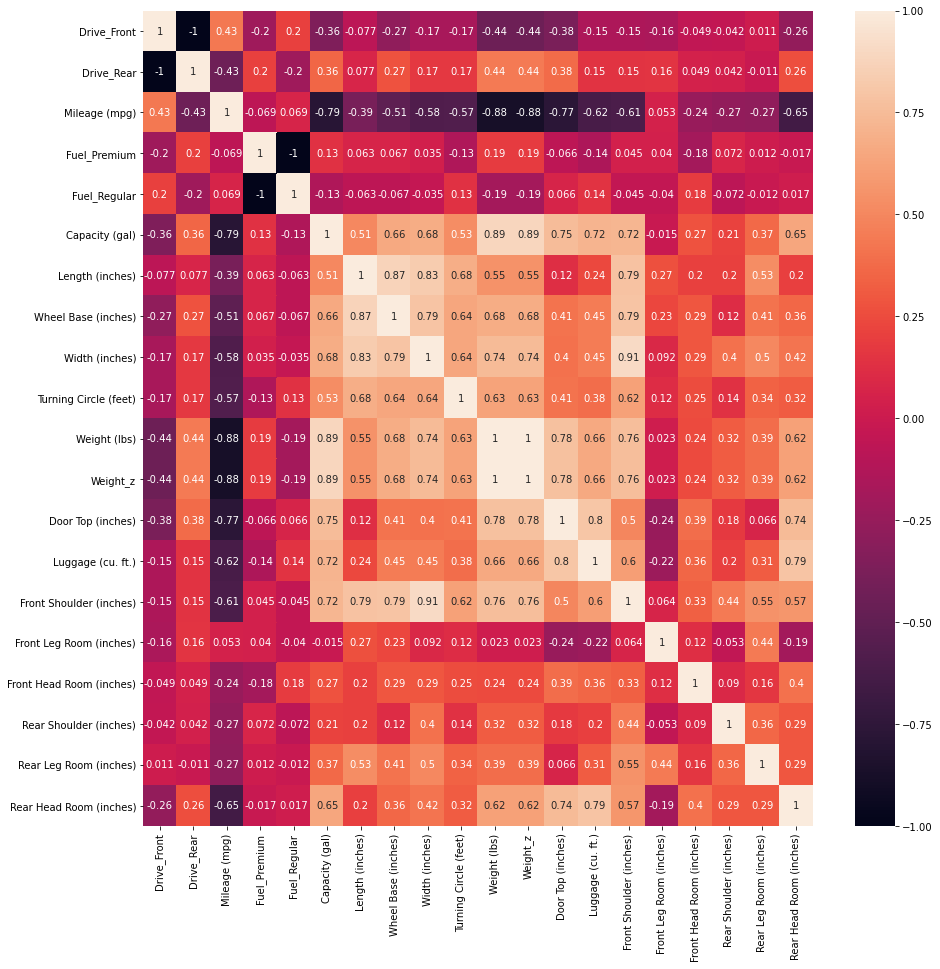

In [21]:
#visual representation
#code taken from https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas
plt.rcParams['figure.figsize'] = [15, 15]

#code taken from https://datatofish.com/correlation-matrix-pandas/
import seaborn as sns
sns.heatmap(auto.corr(), annot=True)
plt.show()

## 7. Perform PCA

In [22]:
from sklearn.decomposition import PCA
X = auto[['Drive_Front', 'Drive_Rear', 'Mileage (mpg)', 'Fuel_Premium', 'Fuel_Regular', 'Capacity (gal)', 'Length (inches)',
         'Wheel Base (inches)', 'Width (inches)', 'Turning Circle (feet)', 'Weight (lbs)', 'Weight_z', 'Door Top (inches)',
         'Luggage (cu. ft.)', 'Front Shoulder (inches)', 'Front Leg Room (inches)', 'Front Head Room (inches)',
         'Rear Shoulder (inches)', 'Rear Leg Room (inches)', 'Rear Head Room (inches)']]
pca = PCA(n_components = 3)
pca.fit(X)

PCA(n_components=3)

In [23]:
print(pca.explained_variance_)

[4.01539518e+05 2.07474742e+02 1.26280531e+02]


## 8. Create a scatter plot of the non-normalized weight relative to mpg

Text(0.5, 1.0, 'Weight (lbs) vs. Mileage (mpg)')

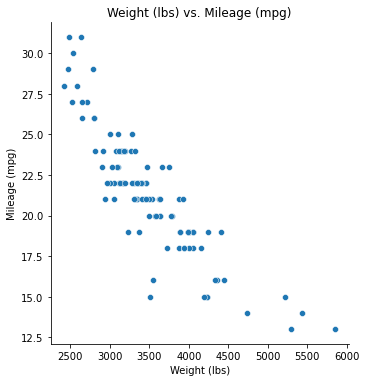

In [24]:
#use seaborn relplot to create scatterplot
sns.relplot(x=auto['Weight (lbs)'], y=auto['Mileage (mpg)'], kind="scatter")
plt.title('Weight (lbs) vs. Mileage (mpg)')

## 9. Create histograms for non-normalized luggage using 6 bins and mpg using 7 bins

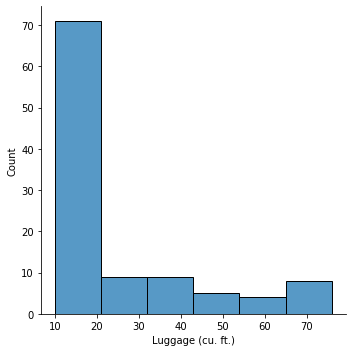

In [25]:
#use seaborn displot to create histogram
#luggage plot
sns.displot(data=auto, x='Luggage (cu. ft.)', kind="hist", bins=6)

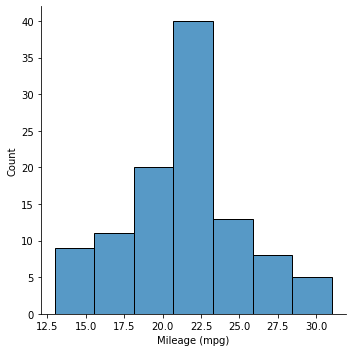

In [26]:
#use seaborn displot to create histogram
#mpg plot
sns.displot(data=auto, x='Mileage (mpg)', kind="hist", bins=7)

## 10. Perform cross-tab of the two fuel type variables versus the two drive type variables

In [27]:
#create crosstab
fuel_v_drive = pd.crosstab(auto['Drive Type'], auto['Fuel Type'])
print(fuel_v_drive)

Fuel Type   Premium  Regular
Drive Type                  
Front            11       70
Rear              8       17


<AxesSubplot:title={'center':'Relationship between Drive and Fuel Types'}, xlabel='Drive Type', ylabel='Count'>

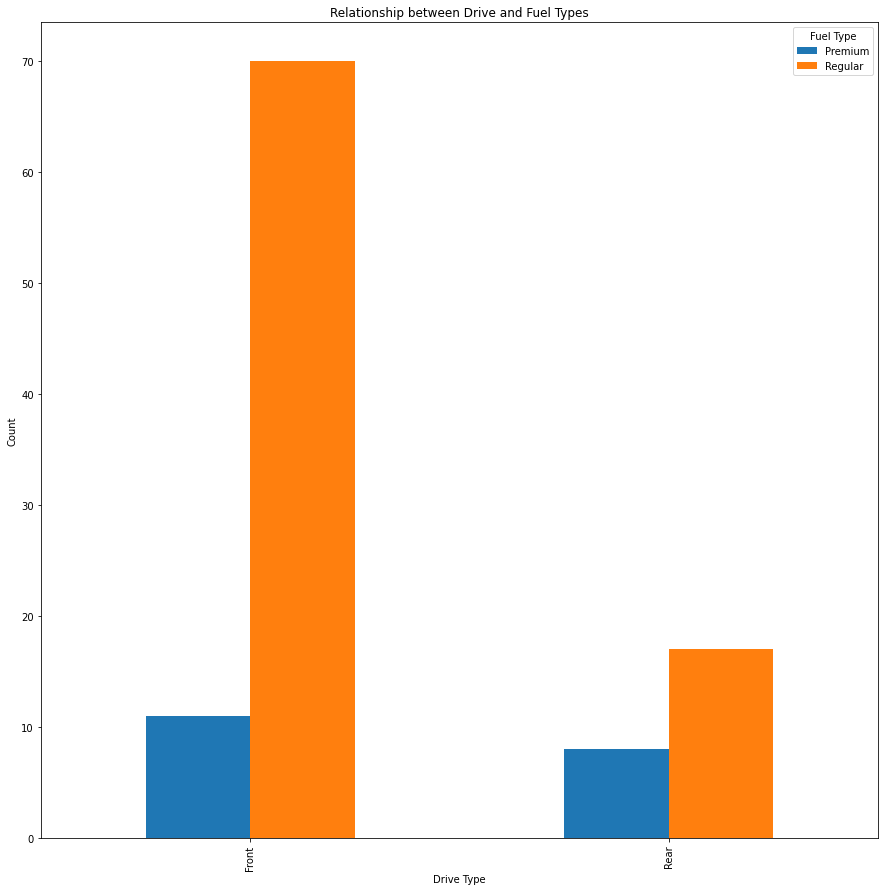

In [28]:
#plot crosstab
fuel_v_drive.plot(kind='bar', xlabel='Drive Type', ylabel='Count', title='Relationship between Drive and Fuel Types')

## 11. Create a new dataframe where fuel = 'regular' and mpg > 21 called auto_sub

In [29]:
#first grab all of the appropriate fuel types
auto_sub = auto[auto['Fuel Type'] == 'Regular']
#next, filter based on required mpg
auto_sub = auto_sub[auto_sub['Mileage (mpg)'] > 21]
#print top of df
auto_sub.head()

,Name,Drive Type,Drive_Front,Drive_Rear,Mileage (mpg),Fuel Type,Fuel_Premium,Fuel_Regular,Capacity (gal),Length (inches),...,Weight (lbs),Weight_z,Door Top (inches),Luggage (cu. ft.),Front Shoulder (inches),Front Leg Room (inches),Front Head Room (inches),Rear Shoulder (inches),Rear Leg Room (inches),Rear Head Room (inches)
0,Acura Integra,Front,1,0,31.0,Regular,0,1,13.2,172.0,...,2635,-1.369178,47.5,13.0,51.5,41.5,2.0,46.5,25.0,0.5
2,Buick Century,Front,1,0,22.0,Regular,0,1,17.5,195.0,...,3350,-0.240446,50.5,17.0,58.0,44.0,5.0,57.0,30.0,2.0
6,Chevrolet Cavalier,Front,1,0,26.0,Regular,0,1,15.2,181.0,...,2795,-1.116595,50.5,14.0,54.5,41.5,4.5,53.5,28.0,2.0
8,Chevrolet Lumina,Front,1,0,22.0,Regular,0,1,16.6,201.0,...,3350,-0.240446,51.0,16.0,58.5,42.5,4.5,57.0,30.0,2.0
9,Chevrolet Malibu,Front,1,0,24.0,Regular,0,1,15.2,190.0,...,3075,-0.674574,50.5,17.0,55.0,43.0,4.5,54.0,30.5,2.0
